In [ ]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 8.6 MB/s eta 0:00:00


In [ ]:
import tensorflow
import tensorflow.keras.backend as K
import os
from tqdm import tqdm
import cv2
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import mtcnn
import matplotlib.pyplot as plt


In [ ]:
tensorflow.__version__

'2.15.0'

In [ ]:
model = tensorflow.keras.models.load_model('/modeling/model')

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 model (Functional)          (None, 256)                  1484601   ['input_1[0][0]',             
                                                          6          'input_2[0][0]']             
                                                                                                  
 lambda (Lambda)             (None, 1)                    0         ['model[0][0]',         

In [ ]:
def load_image(imgPath):
  img = cv2.imread(imgPath)
  return img

def Extract_faces(img):
  face_model = mtcnn.MTCNN()
  main= img.copy()
  boxes = face_model.detect_faces(main)
  if len(boxes) >1:
    biggest = 0
    index = -1
    for box in boxes:

      x, y, width, height = box['box']
      if width > biggest:
          biggest = width
          index+=1
    boxes = boxes[index]


  try:
    print(boxes)
    x, y, width, height = boxes[0]['box']
  except:
    x, y, width, height = boxes['box']

  try:
    main = img[y:y+height,x-30:x+width+30,:]
  except:

    try:
      main = img[y:y+height,x-20:x+width+20,:]
    except:
      try:
        main = img[y:y+height,x-10:x+width+10,:]
      except:
        try:
          main = img[y:y+height,x-5:x+width+5,:]
        except:
          main = img[y:y+height,x:x+width,:]
  main = cv2.resize(main,(150,150))
  return main[:,:,::-1]

def Similarity_Prediction(img1path,img2path,model,plotResult=False):

  #Load images
  img = load_image(img1path)
  img2 = load_image(img2path)

  #Select Face
  try:
    img_face = Extract_faces(img) / 255
  except:
    print("Image 1 Not Clear. Try another image...")
    return 'error'
  try:
    img2_face = Extract_faces(img2) / 255
  except:
    print("Image 2 Not Clear. Try another image...")
    return 'error'

  #Predict part
  marge_images = [np.array([img_face]),np.array([img2_face])]
  similarity = model.predict(x=marge_images)
  if plotResult:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    plt.suptitle("Images are similar" if similarity.round(2) > 0.5 else "Images are not similar")
    ax1.imshow(img_face)
    ax2.imshow(img2_face)
    plt.show()

1/1 [==============================] - 0s 205ms/step
[{'box': [373, 56, 144, 186], 'confidence': 0.9974543452262878, 'keypoints': {'left_eye': (424, 129), 'right_eye': (488, 122), 'nose': (471, 154), 'mouth_left': (440, 201), 'mouth_right': (495, 195)}}]
1/1 [==============================] - 0s 169ms/step
[{'box': [429, 51, 152, 203], 'confidence': 0.9948676824569702, 'keypoints': {'left_eye': (480, 127), 'right_eye': (549, 128), 'nose': (519, 163), 'mouth_left': (486, 207), 'mouth_right': (542, 210)}}]
1/1 [==============================] - 1s 540ms/step


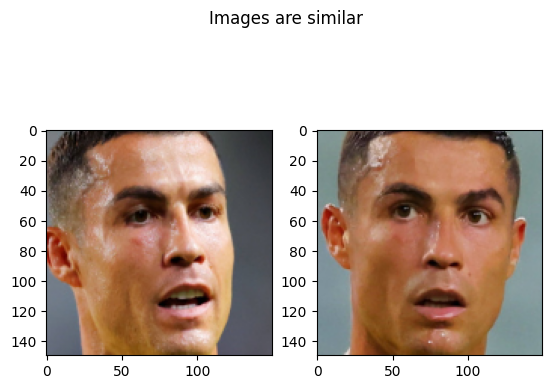

In [ ]:
Similarity_Prediction('/content/cristiano-ronaldo-al-nassr-2023-1690844161-112905.jpg?lm=1690844177','/content/cristiano-ronaldo-al-nassr-2023-1692731063-114594.jpg?lm=1692731118',model,True)